<a href="https://colab.research.google.com/github/Gabeduffy/ADS500B/blob/main/ADS_500B_Team_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Topic #1 Data Importing and Pre-processing**

**Task # 1 Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used**

In [ ]:
#imports the needed libraries into the current work environment
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Let's upload the house_sales.csv data set
from google.colab import files
house_sales = files.upload()
# imports the working file into a dataframe and names it "house_sales" and print first five observations
house_sales = pd.read_csv("house_sales.csv")
house_sales.head()


In [ ]:

# imports the working file into a dataframe and names it "house_df"
house_df = pd.read_csv("house_sales.csv")
# info() method describes the characteristics of the dataframe such as dimensions, datatype, and import methods used.
house_df.info()
# provide a descriptive statistics of the "house_sales.csv" dataframe
# house_df.describe(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       20479 non-null  float64
 4   bathrooms      20545 non-null  float64
 5   sqft_living    20503 non-null  float64
 6   sqft_lot       20569 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

File type is Comma Seperated Values(CSV)
Import method used is Google Colab to pull dataset from directory

The key variable for understanding the distribution of house prices are price column (which provides the sale prices of the houses) and zipcode column (identifies the zip codes of the houses, allowing you to group the data by zip code and analyze the distribution of house prices within each area).

Task # 2 **Clean, wrangle, and handle missing data**

In [ ]:
# Checking  for missing values
house_sales.isnull().sum()

In [ ]:
#Imputing missing values with the mode (most frequent value) of the categorical columns
house_sales['waterfront'].fillna(house_sales['waterfront'].mode()[0], inplace=True)
house_sales['view'].fillna(house_sales['view'].mode()[0], inplace=True)
house_sales['condition'].fillna(house_sales['condition'].mode()[0], inplace=True)
house_sales['grade'].fillna(house_sales['grade'].mode()[0], inplace=True)

# Imputing missing values for numerical columns with mean
house_sales['bedrooms'].fillna(house_sales['bedrooms'].mean(), inplace=True)
house_sales['bathrooms'].fillna(house_sales['bathrooms'].mean(), inplace=True)
house_sales['sqft_living'].fillna(house_sales['sqft_living'].mean(), inplace=True)
house_sales['sqft_lot'].fillna(house_sales['sqft_lot'].mean(), inplace=True)

# Verifing that there are no more missing values in the columns
print(house_sales.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


**Imputing with Mode or Mean:**

For categorical columns like waterfront, view, condition, and grade, imputing missing values with the mode (most frequent value) of each respective column.

For numerical columns like bedrooms, bathrooms, sqft_living, and sqft_lot imputing the missing values with the mean of each respective column.

**Dropping Missing Values:**

If the proportion of missing values is very small and randomly distributed, then dropping those rows entirely is better choice. However, if dropping missing values would result in a significant loss of data, especially in columns critical for analysis, imputation might be a better choice.

Task #3 **Transform data appropriately using techniques such as aggregation, normalization, and feature construction**

Task #4 **Reduce redundant data and perform need based discretization**

In [ ]:
# uploading dataset to google colab
from google.colab import files
uploaded = files.upload()
#read data into Dataframe
import pandas as pd
house_sales = pd.read_csv('house_sales.csv')
#priniting first few rows of dataset to makesure uploaded properly
print(house_sales.head())

Saving house_sales.csv to house_sales (2).csv
           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0       3.0       1.00       1180.0   
1  6414100192  20141209T000000  538000.0       3.0       2.25       2570.0   
2  5631500400  20150225T000000  180000.0       2.0       1.00        770.0   
3  2487200875  20141209T000000  604000.0       4.0       3.00       1960.0   
4  1954400510  20150218T000000  510000.0       3.0       2.00       1680.0   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0    5650.0     1.0           0     0  ...      7        1180              0   
1    7242.0     2.0           0     0  ...      7        2170            400   
2   10000.0     1.0           0     0  ...      6         770              0   
3    5000.0     1.0           0     0  ...      7        1050            910   
4    8080.0     1.0           0     0  ...      8        1680              0   

   y

In [ ]:
# identifying redundant or irrelevent columns
columns_to_drop = ['id', 'date', 'floors', 'sqft_above','sqft_basement','yr_built','lat','long', 'yr_renovated','sqft_living15','sqft_lot15']
# remove identified columns from the Dataframe
house_sales_cleaned = house_sales.drop(columns=columns_to_drop)
#priniting cleaned data to make sure columns were dropped
print(house_sales_cleaned.head())


      price  bedrooms  bathrooms  sqft_living  sqft_lot  waterfront  view  \
0  221900.0       3.0       1.00       1180.0    5650.0           0     0   
1  538000.0       3.0       2.25       2570.0    7242.0           0     0   
2  180000.0       2.0       1.00        770.0   10000.0           0     0   
3  604000.0       4.0       3.00       1960.0    5000.0           0     0   
4  510000.0       3.0       2.00       1680.0    8080.0           0     0   

   condition  grade  zipcode  
0          3      7    98178  
1          3      7    98125  
2          3      6    98028  
3          5      7    98136  
4          3      8    98074  


In [ ]:

# identifying missing values
missing_values = house_sales.isna().sum()

#Imputing missing values with the mode (most frequent value) of the categorical columns
house_sales['waterfront'].fillna(house_sales['waterfront'].mode()[0], inplace=True)
house_sales['view'].fillna(house_sales['view'].mode()[0], inplace=True)
house_sales['condition'].fillna(house_sales['condition'].mode()[0], inplace=True)
house_sales['grade'].fillna(house_sales['grade'].mode()[0], inplace=True)

# Imputing missing values for numerical columns with mean
house_sales['bedrooms'].fillna(house_sales['bedrooms'].mean(), inplace=True)
house_sales['bathrooms'].fillna(house_sales['bathrooms'].mean(), inplace=True)
house_sales['sqft_living'].fillna(house_sales['sqft_living'].mean(), inplace=True)
house_sales['sqft_lot'].fillna(house_sales['sqft_lot'].mean(), inplace=True)

# Verifing that there are no more missing values
print(house_sales.isnull().sum())


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [ ]:
# select numerical columns for discretization
numerical_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']

# display statistics of numerical columns
print(house_sales[numerical_columns].describe())


           bedrooms     bathrooms   sqft_living      sqft_lot
count  21613.000000  21613.000000  21613.000000  2.161300e+04
mean       3.372821      2.113507   2081.073697  1.517982e+04
std        0.905964      0.749674    891.234976  4.047174e+04
min        0.000000      0.000000    290.000000  5.200000e+02
25%        3.000000      1.750000   1450.000000  5.140000e+03
50%        3.000000      2.113507   1980.000000  7.830000e+03
75%        4.000000      2.500000   2510.000000  1.186700e+04
max       33.000000      8.000000  12050.000000  1.651359e+06


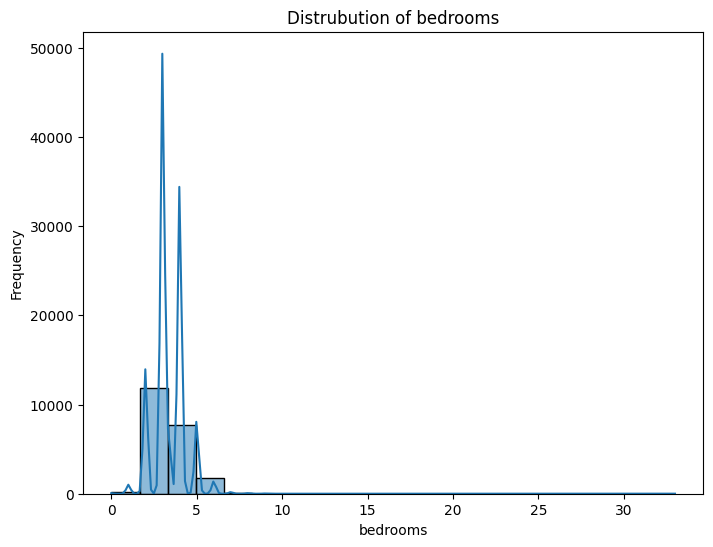

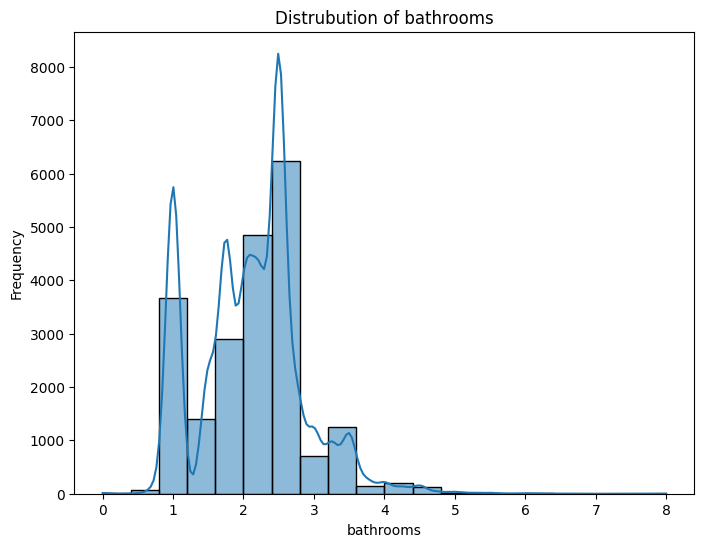

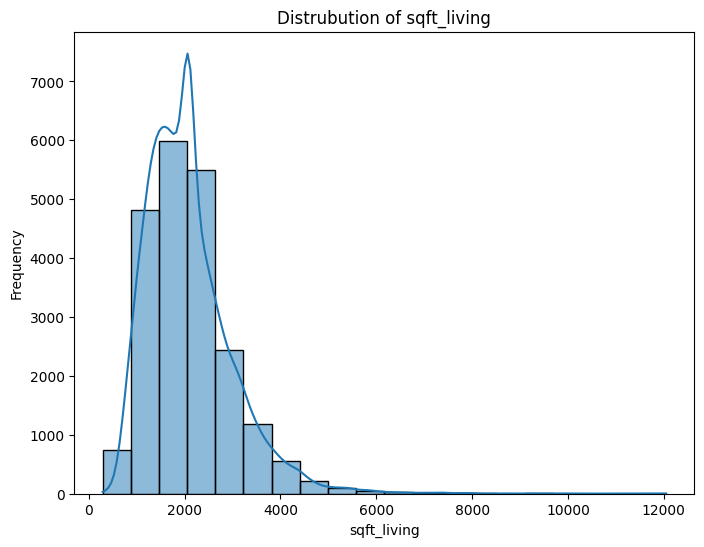

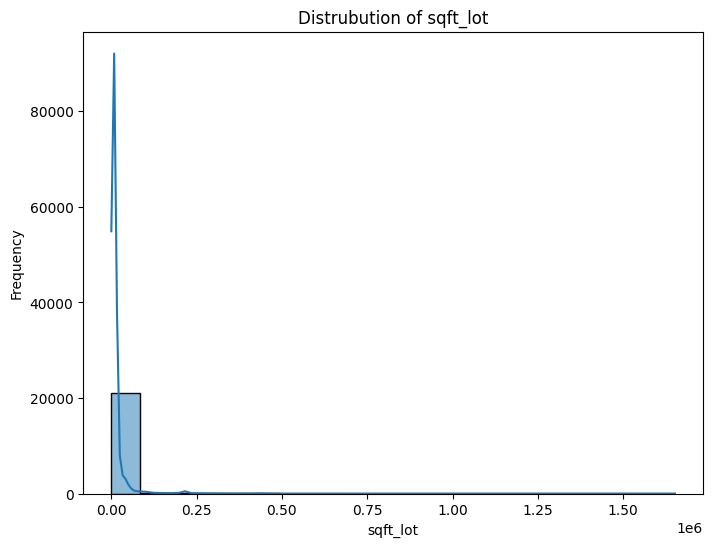

In [ ]:
# Visualize the distribution of values in each numerical column
import matplotlib.pyplot as plt
import seaborn as sns

# give visualization charcteristics:
for column in numerical_columns:
  plt.figure(figsize=(8,6))
  sns.histplot(house_sales[column], bins=20, kde=True)
  plt.title(f'Distrubution of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()


**Topic #3 Data Analytics**

**Task # 1 Determine the need for a supervised or unsupervised learning method and identify dependent and independent variables**

**Task # 2 Train, test, and provide accuracy and evaluation metrics for model results**


**Unsupervised Learning Method**

key variables for understanding the distribution of house prices are the price column and the zipcode column, and the goal is to analyze the distribution of house prices within each area (zip code). In this case, the dependent variable would be the price column, and the independent variable would be the zipcode column.

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# identifying missing values
missing_values = house_sales.isna().sum()

#Imputing missing values with the mode (most frequent value) of the categorical columns
house_sales['waterfront'].fillna(house_sales['waterfront'].mode()[0], inplace=True)
house_sales['view'].fillna(house_sales['view'].mode()[0], inplace=True)
house_sales['condition'].fillna(house_sales['condition'].mode()[0], inplace=True)
house_sales['grade'].fillna(house_sales['grade'].mode()[0], inplace=True)

# Imputing missing values for numerical columns with mean
house_sales['bedrooms'].fillna(house_sales['bedrooms'].mean(), inplace=True)
house_sales['bathrooms'].fillna(house_sales['bathrooms'].mean(), inplace=True)
house_sales['sqft_living'].fillna(house_sales['sqft_living'].mean(), inplace=True)
house_sales['sqft_lot'].fillna(house_sales['sqft_lot'].mean(), inplace=True)

# Set pandas display options to show numbers in full format
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Extract relevant features (price and zipcode)
X = house_sales[['price', 'zipcode']]

# Initialize the KMeans model with the number of clusters and n_init
n_clusters = 5  # example
n_init = 10  # explicitly to suppress the warning
kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Add cluster labels to the DataFrame
house_sales['Cluster'] = kmeans.labels_

# Group the data by cluster and zipcode and compute statistics
cluster_zipcode_stats = house_sales.groupby(['Cluster', 'zipcode'])['price'].describe()[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
# Change the column header from 'mean' to 'mean price'
cluster_zipcode_stats.columns = ['count', 'mean price', 'std', 'min', '25%', '50%', '75%', 'max']
# Display the statistics with zip codes for each cluster
for cluster in range(n_clusters):
    print(f"Cluster {cluster}:")
    print(cluster_zipcode_stats.loc[cluster].head(10))
    print()

Cluster 0:
         count  mean price      std       min       25%       50%       75%  \
zipcode                                                                       
98001   323.00   254483.30 60758.52 100000.00 212250.00 250000.00 289975.00   
98002   199.00   234284.04 52041.45  95000.00 199975.00 235000.00 268500.00   
98003   252.00   266038.72 57468.24 128000.00 225000.00 258625.00 305000.00   
98005     2.00   405550.00  7848.89 400000.00 402775.00 405550.00 408325.00   
98006    25.00   347278.00 45933.18 247500.00 331500.00 365000.00 380000.00   
98007    10.00   370730.00 37041.66 295000.00 352500.00 382500.00 398825.00   
98008    27.00   361298.15 44664.80 250000.00 350000.00 370000.00 397500.00   
98010    57.00   278337.70 67543.56 135000.00 224400.00 263500.00 335000.00   
98011    49.00   359482.14 44717.14 245500.00 333500.00 370900.00 398000.00   
98014    61.00   285996.59 87893.88  80000.00 225000.00 307000.00 345000.00   

              max  
zipcode            


**Unsupervised Learning Method Data Analysis Findings:**

1.)Cluster 3 zip codes have the highest mean prices of all the clusters

2.)Cluster 0 zip codes has the lowerst mean prices of all the clusters

Determining which cluster has the higest Standard Deviation

In [31]:

# Identify the cluster with the highest average standard deviation
max_deviation_cluster = average_std.idxmax()
max_deviation_value = average_std[max_deviation_cluster]

# Print the cluster with the highest average standard deviation
print(f"Cluster {max_deviation_cluster} has the highest average standard deviation: {max_deviation_value:.2f}")

Cluster 3 has the highest average standard deviation: 614007.25


**Determining whether the zipcode variable has a statistically significant effect on the price variable.**

In [33]:
from scipy.stats import f_oneway

# Group the data by zipcode and calculate the mean price for each group
zipcode_groups = house_sales.groupby('zipcode')['price'].apply(list)

# Perform ANOVA
f_statistic, p_value = f_oneway(*zipcode_groups)

print(f"ANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA p-value: {p_value:.2f}")

ANOVA F-statistic: 214.63
ANOVA p-value: 0.00


** Are statisics indicate that there are significant differences in mean prices across different zipcodes.**